In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
dt1 = pd.read_csv('machinedata.csv')
dt2 = pd.read_csv('cafe.csv')


### Transforming dt2. 
1. census_year to year only
2. Change total to Total_cafe

In [3]:
dt2['census_year'] = pd.to_datetime(dt2['census_year'] )
dt2['census_year'] = dt2['census_year'].dt.year.astype(int)
dt2 = dt2.rename(columns ={'total':'Total_cafe'})
dt2.head(3)

,census_year,clue_small_area,Total_cafe
0,2002,Carlton,241
1,2002,Docklands,24
2,2002,East Melbourne,39


In [4]:
# renaming the column total to Total_cafe
dt2 = dt2.rename(columns ={'total':'Total_cafe'})
dt2.head(2)

,census_year,clue_small_area,Total_cafe
0,2002,Carlton,241
1,2002,Docklands,24


# Checking each datasets.

In [5]:
dt1['clue_small_area'].unique()

array(['Carlton', 'Docklands', 'East Melbourne', 'Kensington',
       'Melbourne (CBD)', 'Melbourne (Remainder)', 'North Melbourne',
       'Parkville', 'Port Melbourne', 'South Yarra', 'Southbank',
       'West Melbourne (Industrial)', 'West Melbourne (Residential)'],
      dtype=object)

In [6]:
dt1['census_year'].unique()

array([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

In [40]:
dt1.shape

(273, 23)

In [41]:
dt2['clue_small_area'].unique()

array(['Carlton', 'Docklands', 'East Melbourne', 'Kensington',
       'Melbourne (CBD)', 'Melbourne (Remainder)', 'North Melbourne',
       'Parkville', 'Port Melbourne', 'South Yarra', 'Southbank',
       'West Melbourne (Industrial)', 'West Melbourne (Residential)'],
      dtype=object)

In [42]:
dt2['census_year'].unique()

array([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

In [43]:
dt2.shape

(27573, 3)

### Need to check for duplicate in the dt2 dataset.

In [7]:
dup = dt2[dt2.duplicated()]
dup.head(10)

,census_year,clue_small_area,Total_cafe
273,2002,Carlton,241
274,2002,Docklands,24
275,2002,East Melbourne,39
276,2002,Kensington,8
277,2002,Melbourne (CBD),1072
278,2002,Melbourne (Remainder),37
279,2002,North Melbourne,79
280,2002,Parkville,30
281,2002,Port Melbourne,3
282,2002,South Yarra,10


In [45]:
dup.shape

(27300, 3)

#### Checking over the two numbers we can drop the duplicates

In [9]:
dt2 = dt2.drop_duplicates()

In [47]:
dt2.shape

(273, 3)

In [48]:
dt2['clue_small_area'].unique()

array(['Carlton', 'Docklands', 'East Melbourne', 'Kensington',
       'Melbourne (CBD)', 'Melbourne (Remainder)', 'North Melbourne',
       'Parkville', 'Port Melbourne', 'South Yarra', 'Southbank',
       'West Melbourne (Industrial)', 'West Melbourne (Residential)'],
      dtype=object)

In [49]:
dt2['census_year'].unique()

array([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

## Merging the datasets

In [8]:
# Merging the two dataset based on the census_year and clue_small_area
data = pd.merge(dt2, dt1, how='left', on=['census_year','clue_small_area'])
data.head(2)

,census_year,clue_small_area,Total_cafe,accommodation_and_food_services,administrative_and_support_services,agriculture_forestry_and_fishing,arts_and_recreation_services,construction,education_and_training,electricity_gas_water_and_waste_services,...,mining,other_services,professional_scientific_and_technical_services,public_administration_and_safety,rental_hiring_and_real_estate_services,retail_trade,transport_postal_and_warehousing,wholesale_trade,total_establishments_in_block,Total_Dwel
0,2002,Carlton,241,190,40,0,31,13,61,13,...,0,146,143,13,15,166,10,24,1069,80.0
1,2002,Docklands,24,23,6,1,9,4,1,6,...,0,14,7,7,4,11,36,3,147,850.0


In [51]:
data.dtypes

census_year                                         int64
clue_small_area                                    object
Total_cafe                                          int64
accommodation_and_food_services                     int64
administrative_and_support_services                 int64
agriculture_forestry_and_fishing                    int64
arts_and_recreation_services                        int64
construction                                        int64
education_and_training                              int64
electricity_gas_water_and_waste_services            int64
financial_and_insurance_services                    int64
health_care_and_social_assistance                   int64
information_media_and_telecommunications            int64
manufacturing                                       int64
mining                                              int64
other_services                                      int64
professional_scientific_and_technical_services      int64
public_adminis

## Feature engineering
The task is to classify each suburb as a potential to open a new cafe, to do so we need to apply some metrics to each feature.
Metrics: Each feature would receive a weight based on the effect of the industry to bring people into the area, from a 0 to 10 where 10 is great industry to have next to a cafe.
1. accommodation_and_food_services: 0.5 - Accomodation has potential to bring people in the area but dependent on the accomodation, it might has its own cafe. Hence a neutral values is addressed.
2. administrative_and_support_services: 0.8 - Offices has a tendency to bring large number of people into a location but limits the ability to trade during the weekend.
3. agriculture_forestry_and_fishing: 0.2 - Morelikely a small office with large number of people working on sites.
4. arts_and_recreation_services: 0.6 - Huge potential for both weekends and weekdays but timing can differ greatly with shows and training happening mostly in the afternoons and evenings.
5. construction: 0.2 - Construction might bring a large number of workers in an area for a specific amount of time only.
6. education_and_training: 0.9 - Huge potential with both working personels, students and other people who may attend regularly. Neither potential during weekends, public holidays and school holidays.
7. electricity_gas_water_and_waste_services: 0.3 - Similar to agriculture_forestry_and_fishing with a higher humber of workers.
8. financial_and_insurance_services: 0.8 - administrative_and_support_services.
9. health_care_and_social_assistance: 1.0 - Extremely large potential including weekend work during weekends.
10. information_media_and_telecommunications: 0.8- similar to administrative_and_support_services
11. manufacturing: 0.9 - Potential similar to education_and_training.
12. mining: 0.1 - Mainly for Victorian economy.
13. other_services: 0.2 - No data.
14. professional_scientific_and_technical_services: 0.8 - administrative_and_support_services.
15. public_administration_and_safety: 0.8 - administrative_and_support_services.
16. rental_hiring_and_real_estate_services: 0.6 - Low number of employees
17. retail_trade: 1.0 - Extremely large potential including weekend work during weekends.
18. transport_postal_and_warehousing: 0.6 - Potential with number of employees.  
19. wholesale_trade: 0.5 - Low employee numbers but may be large number of traffic.
20. total_establishments_in_block = 0.5 - Due to missing data
21. Total_Dwel: 1.0 - The potential is directly proportional to the number of dwelling
22. Total_cafe: -0.5 - Inversly proportional.

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [9]:
fdata= data.copy()
fdata.head(13)

,census_year,clue_small_area,Total_cafe,accommodation_and_food_services,administrative_and_support_services,agriculture_forestry_and_fishing,arts_and_recreation_services,construction,education_and_training,electricity_gas_water_and_waste_services,...,mining,other_services,professional_scientific_and_technical_services,public_administration_and_safety,rental_hiring_and_real_estate_services,retail_trade,transport_postal_and_warehousing,wholesale_trade,total_establishments_in_block,Total_Dwel
0,2002,Carlton,241,190,40,0,31,13,61,13,...,0,146,143,13,15,166,10,24,1069,80.0
1,2002,Docklands,24,23,6,1,9,4,1,6,...,0,14,7,7,4,11,36,3,147,850.0
2,2002,East Melbourne,39,54,22,0,42,4,12,8,...,0,40,70,14,5,16,6,7,488,78.0
3,2002,Kensington,8,12,1,0,60,2,2,4,...,0,8,6,3,2,7,5,23,169,81.0
4,2002,Melbourne (CBD),1072,993,489,7,92,68,143,53,...,31,605,1343,161,148,1317,129,128,7164,1452.0
5,2002,Melbourne (Remainder),37,24,24,1,36,5,8,4,...,3,27,94,4,5,17,7,8,378,0.0
6,2002,North Melbourne,79,84,32,2,37,20,14,22,...,0,133,111,7,15,93,43,75,832,89.0
7,2002,Parkville,30,51,3,0,24,0,7,7,...,0,21,6,4,1,19,4,3,206,84.0
8,2002,Port Melbourne,3,4,6,0,9,11,2,5,...,1,2,21,5,3,8,21,35,180,0.0
9,2002,South Yarra,10,15,1,0,4,0,12,6,...,0,11,2,2,0,10,0,0,69,0.0


In [54]:
fdata.shape

(273, 24)

In [31]:
fdata.describe()

,census_year,Total_cafe,accommodation_and_food_services,administrative_and_support_services,agriculture_forestry_and_fishing,arts_and_recreation_services,construction,education_and_training,electricity_gas_water_and_waste_services,financial_and_insurance_services,...,mining,other_services,professional_scientific_and_technical_services,public_administration_and_safety,rental_hiring_and_real_estate_services,retail_trade,transport_postal_and_warehousing,wholesale_trade,total_establishments_in_block,Total_Dwel
count,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,...,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000
mean,2012.000000,219.981685,195.161172,51.721612,1.252747,42.879121,21.340659,39.586081,14.410256,69.586081,...,3.776557,109.358974,198.714286,21.593407,28.853480,174.054945,26.069597,41.893773,1185.611722,502.512821
std,6.066422,427.184373,412.858066,127.443425,1.878243,40.510756,28.234400,77.957290,15.601901,190.121287,...,11.170367,221.723984,466.975774,45.759356,56.544755,401.996407,30.244328,55.610380,2325.187452,1107.539071
min,2002.000000,3.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000
25%,2007.000000,33.000000,24.000000,5.000000,0.000000,16.000000,4.000000,7.000000,6.000000,4.000000,...,0.000000,17.000000,20.000000,4.000000,4.000000,16.000000,5.000000,6.000000,328.000000,0.000000
50%,2012.000000,74.000000,58.000000,16.000000,1.000000,37.000000,12.000000,13.000000,9.000000,15.000000,...,0.000000,40.000000,74.000000,7.000000,11.000000,29.000000,15.000000,22.000000,480.000000,78.000000
75%,2017.000000,161.000000,148.000000,28.000000,2.000000,50.000000,24.000000,24.000000,15.000000,30.000000,...,1.000000,74.000000,127.000000,15.000000,23.000000,118.000000,36.000000,53.000000,903.000000,532.000000
max,2022.000000,1973.000000,2491.000000,702.000000,10.000000,264.000000,157.000000,470.000000,88.000000,1114.000000,...,66.000000,1490.000000,2911.000000,230.000000,347.000000,2278.000000,133.000000,244.000000,14161.000000,8046.000000


In [10]:
def data_feature(df,array):
    x=0
    for cols in df.columns:
        print(f'Columns name: {cols}, Multiple = {array[x]}')
        df[cols] = (df[cols] * array[x])
        x +=1
    return df

In [11]:
array =[0.5,0.8,0.2,0.6,0.2,0.9,0.3,0.8,1.0,0.8,0.9,0.1,0.2,0.8,0.8,0.6,1.0,0.6,0.5,0.5,1.0]

fdata.iloc[:,3:] = data_feature(fdata.iloc[:,3:],array)

Columns name: accommodation_and_food_services, Multiple = 0.5
Columns name: administrative_and_support_services, Multiple = 0.8
Columns name: agriculture_forestry_and_fishing, Multiple = 0.2
Columns name: arts_and_recreation_services, Multiple = 0.6
Columns name: construction, Multiple = 0.2
Columns name: education_and_training, Multiple = 0.9
Columns name: electricity_gas_water_and_waste_services, Multiple = 0.3
Columns name: financial_and_insurance_services, Multiple = 0.8
Columns name: health_care_and_social_assistance, Multiple = 1.0
Columns name: information_media_and_telecommunications, Multiple = 0.8
Columns name: manufacturing, Multiple = 0.9
Columns name: mining, Multiple = 0.1
Columns name: other_services, Multiple = 0.2
Columns name: professional_scientific_and_technical_services, Multiple = 0.8
Columns name: public_administration_and_safety, Multiple = 0.8
Columns name: rental_hiring_and_real_estate_services, Multiple = 0.6
Columns name: retail_trade, Multiple = 1.0
Columns

In [29]:
fdata.describe()


,census_year,Total_cafe,accommodation_and_food_services,administrative_and_support_services,agriculture_forestry_and_fishing,arts_and_recreation_services,construction,education_and_training,electricity_gas_water_and_waste_services,financial_and_insurance_services,...,mining,other_services,professional_scientific_and_technical_services,public_administration_and_safety,rental_hiring_and_real_estate_services,retail_trade,transport_postal_and_warehousing,wholesale_trade,total_establishments_in_block,Total_Dwel
count,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,...,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000
mean,2012.000000,219.981685,24.395147,26.481465,0.010022,9.261890,0.170725,28.858253,0.389077,35.628073,...,0.003777,0.874872,101.741714,11.055824,6.232352,174.054945,5.631033,5.236722,148.201465,502.512821
std,6.066422,427.184373,51.607258,65.251034,0.015026,8.750323,0.225875,56.830864,0.421251,97.342099,...,0.011170,1.773792,239.091597,23.428790,12.213667,401.996407,6.532775,6.951298,290.648431,1107.539071
min,2002.000000,3.000000,0.125000,0.000000,0.000000,0.432000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.008000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.875000,0.000000
25%,2007.000000,33.000000,3.000000,2.560000,0.000000,3.456000,0.032000,5.103000,0.162000,2.048000,...,0.000000,0.136000,10.240000,2.048000,0.864000,16.000000,1.080000,0.750000,41.000000,0.000000
50%,2012.000000,74.000000,7.250000,8.192000,0.008000,7.992000,0.096000,9.477000,0.243000,7.680000,...,0.000000,0.320000,37.888000,3.584000,2.376000,29.000000,3.240000,2.750000,60.000000,78.000000
75%,2017.000000,161.000000,18.500000,14.336000,0.016000,10.800000,0.192000,17.496000,0.405000,15.360000,...,0.001000,0.592000,65.024000,7.680000,4.968000,118.000000,7.776000,6.625000,112.875000,532.000000
max,2022.000000,1973.000000,311.375000,359.424000,0.080000,57.024000,1.256000,342.630000,2.376000,570.368000,...,0.066000,11.920000,1490.432000,117.760000,74.952000,2278.000000,28.728000,30.500000,1770.125000,8046.000000


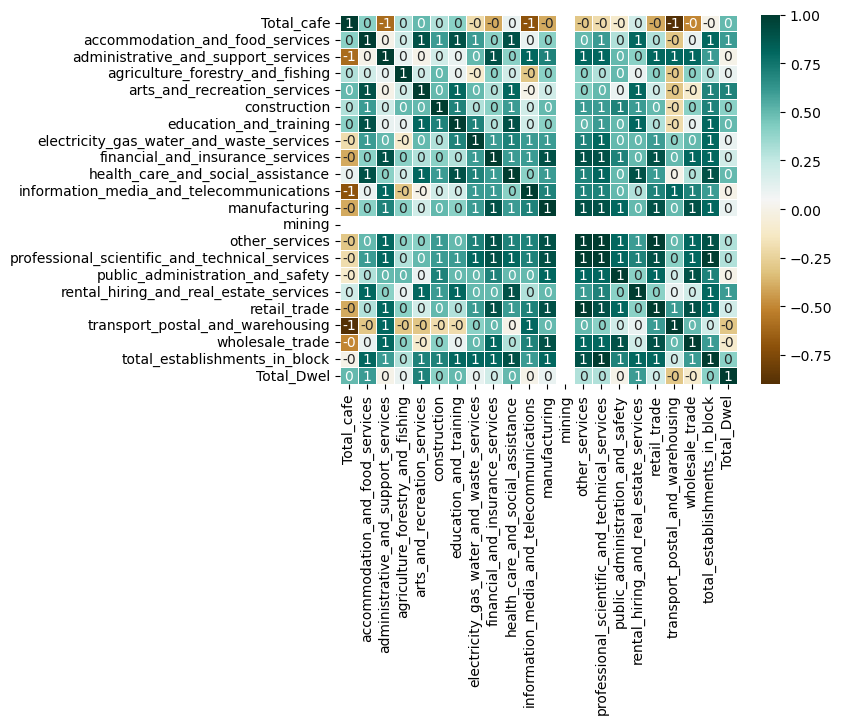

In [20]:

sns.heatmap(data.loc[data['clue_small_area']=='Carlton',:].iloc[:,2:].corr().round(1), annot=True, cmap='BrBG', fmt=".0f", linewidths=.4)
plt.show()

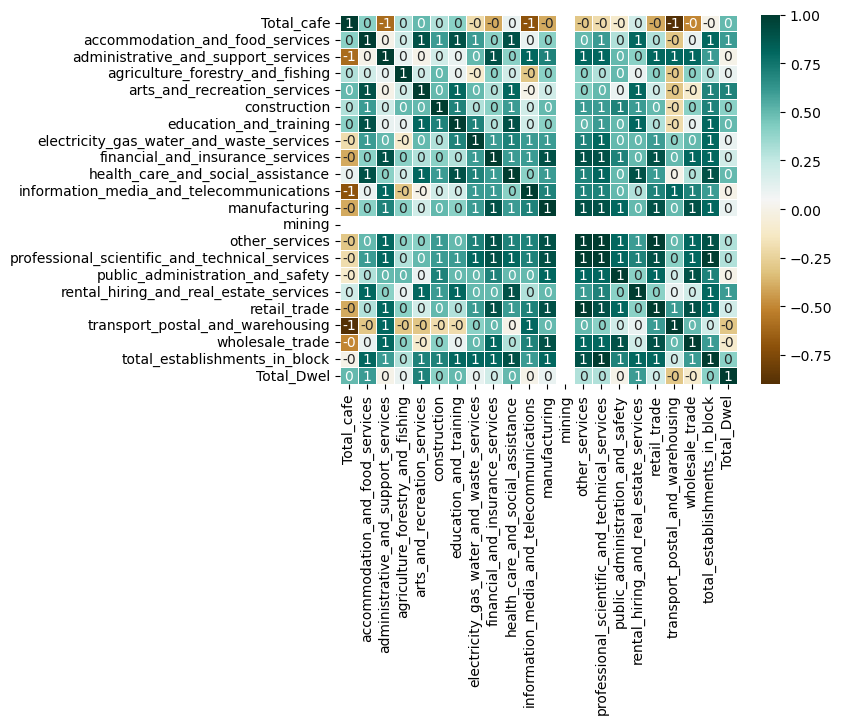

In [21]:
sns.heatmap(fdata.loc[fdata['clue_small_area']=='Carlton',:].iloc[:,2:].corr().round(1), annot=True, cmap='BrBG', fmt=".0f", linewidths=.4)
plt.show()

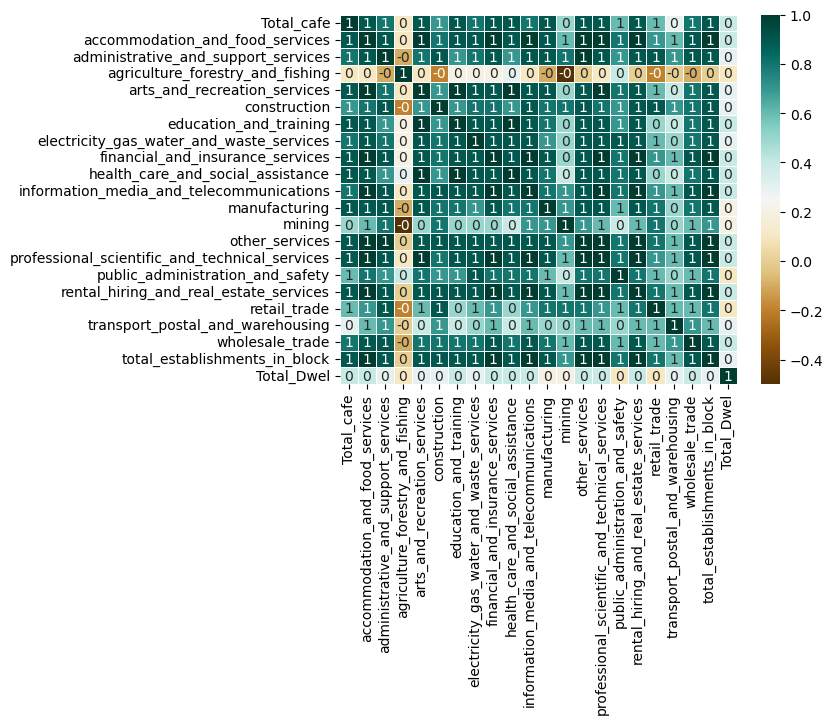

In [22]:
sns.heatmap(fdata.loc[fdata['clue_small_area']=='Docklands',:].iloc[:,2:].corr().round(1), annot=True, cmap='BrBG', fmt=".0f", linewidths=.4)
plt.show()

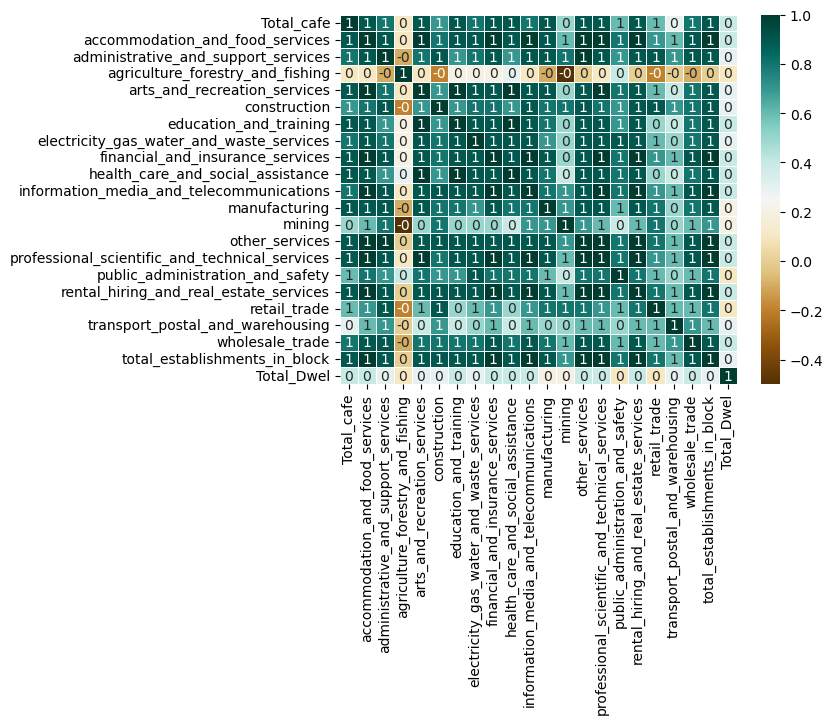

In [23]:
sns.heatmap(data.loc[data['clue_small_area']=='Docklands',:].iloc[:,2:].corr().round(1), annot=True, cmap='BrBG', fmt=".0f", linewidths=.4)
plt.show()

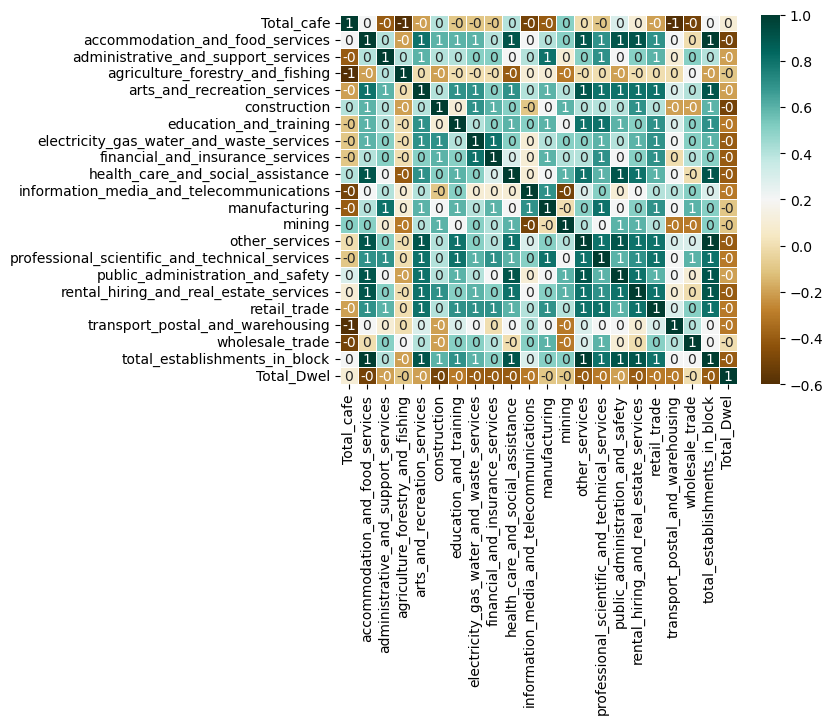

In [85]:
sns.heatmap(data.loc[data['clue_small_area']=='East Melbourne',:].iloc[:,2:].corr().round(1), annot=True, cmap='BrBG', fmt=".0f", linewidths=.4)
plt.show()

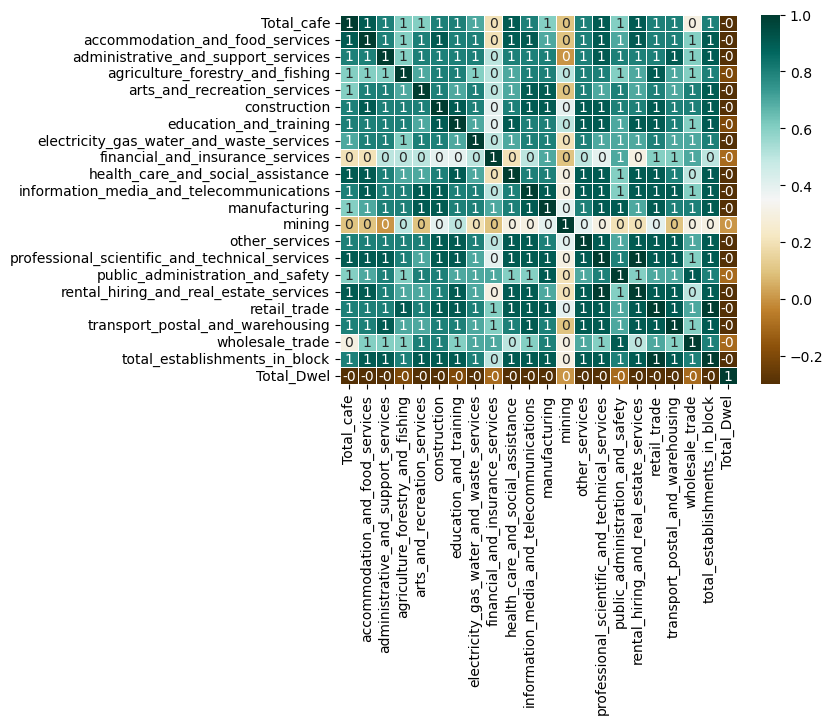

In [84]:

sns.heatmap(fdata.loc[fdata['clue_small_area']=='Kensington',:].iloc[:,2:].corr().round(1), annot=True, cmap='BrBG', fmt=".0f", linewidths=.4)
plt.show()

## Creating New_cafe feature. 
We are using the next year Total_cafe to calculate the number of new cafe opening for the next year.
Therefore we can use the feature from one year to predict the number of new cafe opening the next year.

In [88]:
data.loc[data['clue_small_area']=='Carlton',['census_year','accommodation_and_food_services']].head(22)

,census_year,accommodation_and_food_services
0,2002,190
13,2003,202
26,2004,202
39,2005,218
52,2006,218
65,2007,239
78,2008,239
91,2009,253
104,2010,253
117,2011,253


In [60]:
diff = data.loc[data['clue_small_area']=='Carlton',['census_year','Total_cafe']]

In [89]:
def new_cafe_cal(df):
    value = 0
    array = df['clue_small_area'].unique()
    for city in array:
        print(city)
        diff = df.loc[df['clue_small_area']==city,['accommodation_and_food_services']].diff()
        # removing the last null value 
        diff2 = diff.dropna()
        # Replacing the -ve value with 0- no new cafe opened.
        diff2[diff2< 0] = 0
        print(diff2)
        diff2.loc[len(diff2.index),['accommodation_and_food_services']] = value
        try:
            df.loc[df['clue_small_area']==city,['New_food_services'] ]= diff2.values
        except:
            print('----Error------$$$$$$$$$$$')
    return df


In [90]:
dataT = data.copy()
dataT['New_food_services']=0

In [91]:
#dataT = new_cafe_cal(dataT)
dataT = new_cafe_cal(dataT)

Carlton
     accommodation_and_food_services
13                              12.0
26                               0.0
39                              16.0
52                               0.0
65                              21.0
78                               0.0
91                              14.0
104                              0.0
117                              0.0
130                              0.0
143                             73.0
156                            113.0
169                              0.0
182                              0.0
195                            159.0
208                             63.0
221                              0.0
234                             27.0
247                              0.0
260                              0.0
Docklands
     accommodation_and_food_services
14                              13.0
27                               0.0
40                              58.0
53                               0.0
66                  

/var/folders/rg/kp745q6d17qdv4nzxxh2pnlc0000gn/T/ipykernel_3150/2925662892.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diff2[diff2< 0] = 0
/var/folders/rg/kp745q6d17qdv4nzxxh2pnlc0000gn/T/ipykernel_3150/2925662892.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diff2[diff2< 0] = 0
/var/folders/rg/kp745q6d17qdv4nzxxh2pnlc0000gn/T/ipykernel_3150/2925662892.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [92]:
dataT.head(5)

,census_year,clue_small_area,Total_cafe,accommodation_and_food_services,administrative_and_support_services,agriculture_forestry_and_fishing,arts_and_recreation_services,construction,education_and_training,electricity_gas_water_and_waste_services,...,other_services,professional_scientific_and_technical_services,public_administration_and_safety,rental_hiring_and_real_estate_services,retail_trade,transport_postal_and_warehousing,wholesale_trade,total_establishments_in_block,Total_Dwel,New_food_services
0,2002,Carlton,241,190,40,0,31,13,61,13,...,146,143,13,15,166,10,24,1069,80.0,12
1,2002,Docklands,24,23,6,1,9,4,1,6,...,14,7,7,4,11,36,3,147,850.0,13
2,2002,East Melbourne,39,54,22,0,42,4,12,8,...,40,70,14,5,16,6,7,488,78.0,1
3,2002,Kensington,8,12,1,0,60,2,2,4,...,8,6,3,2,7,5,23,169,81.0,0
4,2002,Melbourne (CBD),1072,993,489,7,92,68,143,53,...,605,1343,161,148,1317,129,128,7164,1452.0,0


In [65]:
fdata['New_cafe']= dataT['New_cafe']

## Identifying issue such as 2019, most business shut down due to covid.

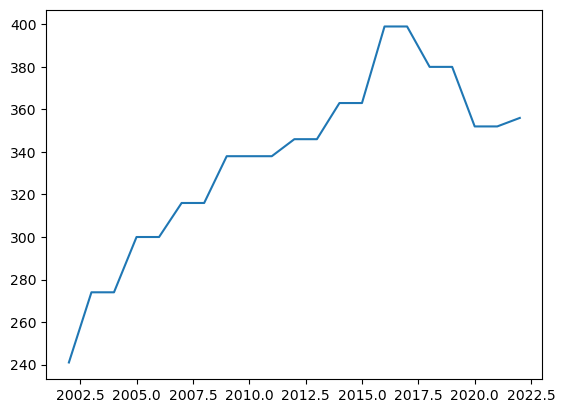

In [66]:
plt.plot(data.loc[(data['clue_small_area']=='Carlton'),['census_year']],data.loc[(data['clue_small_area']=='Carlton'),['Total_cafe']])

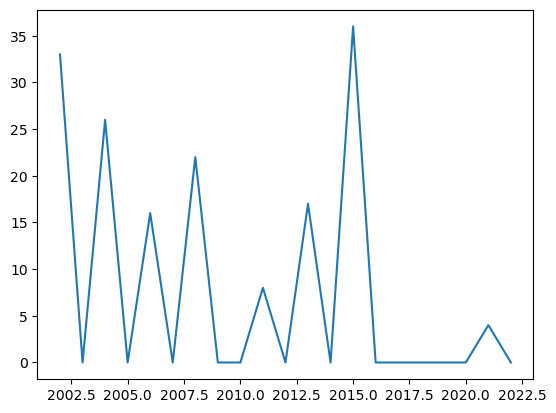

In [67]:
plt.plot(dataT.loc[(dataT['clue_small_area']=='Carlton'),['census_year']],dataT.loc[(dataT['clue_small_area']=='Carlton'),['New_cafe']])

## Attempting Deep learning


In [68]:
fdata.to_csv('DeepLearning.csv', index=False)

In [93]:
dataT.to_csv('DeepLearning2.csv', index = False)

In [40]:
fdata.dtypes

census_year                                         int64
clue_small_area                                    object
Total_cafe                                        float64
accommodation_and_food_services                   float64
administrative_and_support_services               float64
agriculture_forestry_and_fishing                  float64
arts_and_recreation_services                      float64
construction                                      float64
education_and_training                            float64
electricity_gas_water_and_waste_services          float64
financial_and_insurance_services                  float64
health_care_and_social_assistance                 float64
information_media_and_telecommunications          float64
manufacturing                                     float64
mining                                            float64
other_services                                    float64
professional_scientific_and_technical_services    float64
public_adminis

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [259]:
le = preprocessing.LabelEncoder()
fdata['clue_small_area'] = le.fit_transform(fdata['clue_small_area'])

/Users/adrienauguste/opt/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/adrienauguste/opt/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [260]:
fdata['clue_small_area'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [261]:
scaler = StandardScaler()

In [265]:
fdata.describe()

,census_year,clue_small_area,Total_cafe,accommodation_and_food_services,administrative_and_support_services,agriculture_forestry_and_fishing,arts_and_recreation_services,construction,education_and_training,electricity_gas_water_and_waste_services,...,other_services,professional_scientific_and_technical_services,public_administration_and_safety,rental_hiring_and_real_estate_services,retail_trade,transport_postal_and_warehousing,wholesale_trade,total_establishments_in_block,Total_Dwel,New_cafe
count,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,...,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000
mean,2012.000000,6.000000,-109.990842,97.580586,41.377289,0.250549,25.727473,4.268132,35.627473,4.323077,...,21.871795,158.971429,17.274725,17.312088,174.054945,15.641758,20.946886,592.805861,502.512821,4.754579
std,6.066422,3.748529,213.592187,206.429033,101.954740,0.375649,24.306454,5.646880,70.161561,4.680570,...,44.344797,373.580620,36.607485,33.926853,401.996407,18.146597,27.805190,1162.593726,1107.539071,24.224787
min,2002.000000,0.000000,-986.500000,0.500000,0.000000,0.000000,1.200000,0.000000,0.000000,0.000000,...,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.500000,0.000000,-202.000000
25%,2007.000000,3.000000,-80.500000,12.000000,4.000000,0.000000,9.600000,0.800000,6.300000,1.800000,...,3.400000,16.000000,3.200000,2.400000,16.000000,3.000000,3.000000,164.000000,0.000000,0.000000
50%,2012.000000,6.000000,-37.000000,29.000000,12.800000,0.200000,22.200000,2.400000,11.700000,2.700000,...,8.000000,59.200000,5.600000,6.600000,29.000000,9.000000,11.000000,240.000000,78.000000,0.000000
75%,2017.000000,9.000000,-16.500000,74.000000,22.400000,0.400000,30.000000,4.800000,21.600000,4.500000,...,14.800000,101.600000,12.000000,13.800000,118.000000,21.600000,26.500000,451.500000,532.000000,4.000000
max,2022.000000,12.000000,-1.500000,1245.500000,561.600000,2.000000,158.400000,31.400000,423.000000,26.400000,...,298.000000,2328.800000,184.000000,208.200000,2278.000000,79.800000,122.000000,7080.500000,8046.000000,150.000000


In [275]:
fdata.iloc[:,[0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]] = scaler.fit_transform(fdata.iloc[:,[0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]])

/Users/adrienauguste/opt/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/adrienauguste/opt/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/adrienauguste/opt/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/adrienauguste/opt/anaconda3/envs/MachineLearning/lib/python3.11/site-packages

In [276]:
fdata.describe()

,census_year,clue_small_area,Total_cafe,accommodation_and_food_services,administrative_and_support_services,agriculture_forestry_and_fishing,arts_and_recreation_services,construction,education_and_training,electricity_gas_water_and_waste_services,...,other_services,professional_scientific_and_technical_services,public_administration_and_safety,rental_hiring_and_real_estate_services,retail_trade,transport_postal_and_warehousing,wholesale_trade,total_establishments_in_block,Total_Dwel,New_cafe
count,2.730000e+02,273.000000,2.730000e+02,2.730000e+02,2.730000e+02,2.730000e+02,2.730000e+02,2.730000e+02,2.730000e+02,2.730000e+02,...,2.730000e+02,2.730000e+02,2.730000e+02,2.730000e+02,2.730000e+02,273.000000,273.000000,273.000000,273.000000,273.000000
mean,1.041088e-16,6.000000,3.253401e-17,-3.253401e-17,-1.301360e-17,4.229421e-17,5.205441e-17,7.808162e-17,1.301360e-17,3.741411e-17,...,2.602721e-17,5.368111e-17,3.904081e-17,1.301360e-17,-8.133502e-18,15.641758,20.946886,592.805861,502.512821,4.754579
std,1.001837e+00,3.748529,1.001837e+00,1.001837e+00,1.001837e+00,1.001837e+00,1.001837e+00,1.001837e+00,1.001837e+00,1.001837e+00,...,1.001837e+00,1.001837e+00,1.001837e+00,1.001837e+00,1.001837e+00,18.146597,27.805190,1162.593726,1107.539071,24.224787
min,-1.651446e+00,0.000000,-4.111194e+00,-4.711492e-01,-4.065851e-01,-6.682033e-01,-1.010946e+00,-7.572271e-01,-5.087245e-01,-9.253181e-01,...,-4.896087e-01,-4.263160e-01,-4.727572e-01,-5.112140e-01,-4.337716e-01,0.000000,0.000000,7.500000,0.000000,-202.000000
25%,-8.257228e-01,3.000000,1.383244e-01,-4.153377e-01,-3.672800e-01,-6.682033e-01,-6.647243e-01,-6.152958e-01,-4.187668e-01,-5.400433e-01,...,-4.173143e-01,-3.834085e-01,-3.851828e-01,-4.403437e-01,-3.938971e-01,3.000000,3.000000,164.000000,0.000000,0.000000
50%,0.000000e+00,6.000000,3.423575e-01,-3.328337e-01,-2.808087e-01,-1.348129e-01,-1.453915e-01,-3.314331e-01,-3.416603e-01,-3.474059e-01,...,-3.133912e-01,-2.675585e-01,-3.195021e-01,-3.163206e-01,-3.614991e-01,9.000000,11.000000,240.000000,78.000000,0.000000
75%,8.257228e-01,9.000000,4.385111e-01,-1.144407e-01,-1.864763e-01,3.985774e-01,1.761003e-01,9.436095e-02,-2.002982e-01,3.786889e-02,...,-1.597658e-01,-1.538538e-01,-1.443533e-01,-1.037095e-01,-1.396975e-01,21.600000,26.500000,451.500000,532.000000,4.000000
max,1.651446e+00,12.000000,5.088674e-01,5.571056e+00,5.111858e+00,4.665700e+00,5.468350e+00,4.813578e+00,5.531290e+00,4.725379e+00,...,6.238282e+00,5.818861e+00,4.562768e+00,5.636788e+00,5.243353e+00,79.800000,122.000000,7080.500000,8046.000000,150.000000


In [277]:
target = fdata.iloc[:,-1]
features = fdata.drop(columns =['New_cafe'])

In [278]:
target = target.astype('float32')
features = features.astype('float32')

In [279]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train ,y_test = train_test_split(features, target, test_size=0.2, random_state=42)